In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = [3,4,3,4,5,1.5,1.5,2,3,2]
x2 = [1,1,2,3,4,2,4,4,4.5,5]
X = np.array(list(zip(x1, x2)))
y = np.array([1,1,1,1,1,0,0,0,0,0])

In [3]:
X

array([[3. , 1. ],
       [4. , 1. ],
       [3. , 2. ],
       [4. , 3. ],
       [5. , 4. ],
       [1.5, 2. ],
       [1.5, 4. ],
       [2. , 4. ],
       [3. , 4.5],
       [2. , 5. ]])

In [6]:
# assume that we have a weight vector and bias:
w = [1.5, 2.5]
b = [3]

z = X.dot(w) + b
print(z)

[10.   11.5  12.5  16.5  20.5  10.25 15.25 16.   18.75 18.5 ]


## Adaline


$X$ is a dataset as follows:
$$
\begin{equation*}
X = 
\begin{pmatrix}
x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{m}^{(1)} \\
x_{1}^{(2)} & x_{2}^{(2)} & \cdots & x_{m}^{(2)} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{1}^{(n)} & x_{2}^{(n)} & \cdots & x_{m}^{(n)} \\
\end{pmatrix}
\end{equation*}
$$
Weight vector is defined as:
$$
\begin{equation*}
W = [w_1, w_2, ... w_m]
\end{equation*}
$$

$$z = X.W^T + b$$

$prediction:$ If z >= 0.5 then 1 else 0

$$W = W + \Delta{W}$$
$$b = b + \Delta{b}$$

$$\Delta{w_{j}} = \eta . \frac{2}{n} \Sigma_{i=1}^{n}(y^{(i)} - z^{(i)}).x_{j}$$
$$\Delta{b} = \eta . \frac{2}{n} \Sigma_{i=1}^{n}(y^{(i)} - z^{(i)})$$

**In Adaline:**
1. We predict the output values using the $w_1.x_1 + w_2.x_2+...+w_m.x_m + b$ for all the input observations
2. We consider all the predicted values to update each individual weight


## Perceptron

$X$ is a dataset as follows:
$$
\begin{equation*}
X = 
\begin{pmatrix}
x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{m}^{(1)} \\
x_{1}^{(2)} & x_{2}^{(2)} & \cdots & x_{m}^{(2)} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{1}^{(n)} & x_{2}^{(n)} & \cdots & x_{m}^{(n)} \\
\end{pmatrix}
\end{equation*}
$$
Weight vector is defined as:
$$
\begin{equation*}
W = [w_1, w_2, ... w_m]
\end{equation*}
$$

$$z = X.W^T + b$$

$Prediction: \hat{y} = 1 \text{ when z >= 0 else 0}$ 

$$w_j = w_j + \Delta{w_j}$$
$$b = b + \Delta{b}$$

$$\Delta{w_{j}} = \eta (y^{(i)} - \hat{y^{(i)}}).x^{(i)}_{j}$$
$$\Delta{b} = \eta (y^{(i)} - \hat{y^{(i)}}).$$

**In Perceptron**
1. We predict the output values using the $w_1.x_1 + w_2.x_2+...+w_m.x_m + b$ for each observation and update the all the weights. 
2. Then we predict for the next observation, and then update all the weights before moving to the next observation

In [156]:
# Adaline implementation

class Adaline:
    def __init__(self, epochs=10000, eta=0.0001, random_state=42):
        self.epochs = epochs
        self.eta = eta
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1)[0]
        self.errors_ = []
        
        for _ in range(self.epochs):
            z = self.net_input(X)
            adjust = (y - z)
            w_delta = X.T.dot(adjust) * self.eta * 2.0 / X.shape[0]
            self.w_ = self.w_ + w_delta
            b_delta = adjust * self.eta * 2.0 / X.shape[0]
            self.b_ + self.b_ + b_delta 
            self.errors_.append((adjust**2).mean())
#             print(f'Adjusted Weights: {self.w_}. Adjusted Bias: {self.b_}')
#             print(f"Average error: {np.mean(self.errors_)}")

        
    def net_input(self, X):
        return X.dot(self.w_) + self.b_
    
    def predict(self, X):
# In text book they used >= 0.5. For my toy dataset, if the data is standardized, and using >= 0, we get 100% 
# correct prediction.
#        return np.where(self.net_input(X) >= 0.5, 1, 0)
        return np.where(self.net_input(X) >= 0, 1, 0) 
    
    def print_model(self):
        s = str(self.b_)
        for i, w in enumerate(self.w_,start=1):
            if w >= 0:
                s = s + f' + {w}x{i}'
            else:
                s = s + f' - {abs(w)}x{i}'
        print(s)
    


In [154]:
a = Adaline()
a.fit(X,y)
a.print_model()

a_std = Adaline()
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
a_std.fit(X_std,y)
a_std.print_model()

0.006476885381006925 + 0.33091077892505877x1 - 0.15485000964776668x2
0.006476885381006925 + 0.31978375275574633x1 - 0.2223512068769132x2


In [147]:
a.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [148]:
a.predict(X_std)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

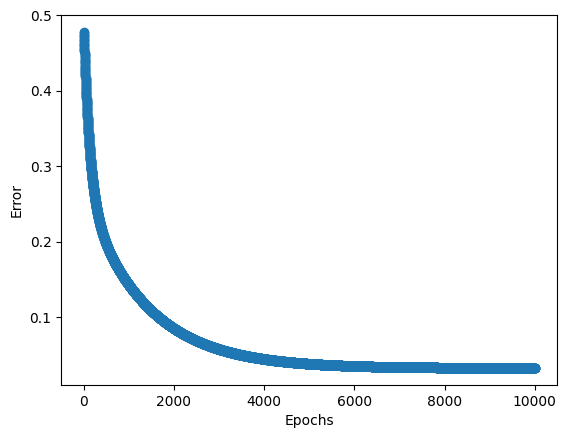

In [149]:
# plot epoch errors
plt.plot(range(1, len(a.errors_) + 1),
        a.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [150]:
def plot_boundary(X, y, w, b):
    plt.scatter(X[:5,0], X[:5, 1], color = 'red', marker = 'o', label = '1')
    plt.scatter(X[5:,0], X[5:, 1], color = 'blue', marker = 's', label = '0')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    p1_x1 = np.min(X[:,0])
    p1_x2 = (-b - w[0]*p1_x1)/w[1]
    
    p2_x1 = np.max(X[:,0])
    p2_x2 = (-b - w[0]*p2_x1)/w[1]
    
    plt.plot([p1_x1, p2_x1], [p1_x2, p2_x2], 'go-')
    
    plt.show()

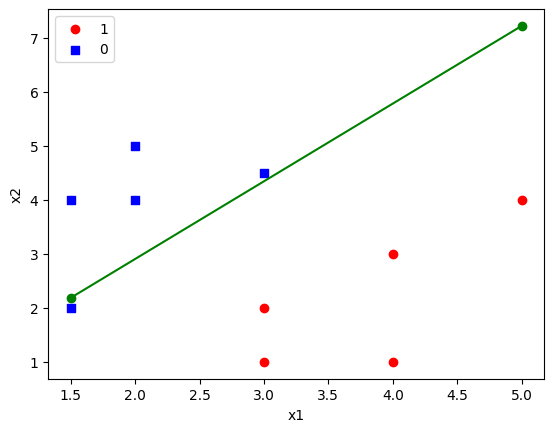

In [151]:
plot_boundary(X, y, a_std.w_, a_std.b_)

In [155]:
a_std.net_input(X)

array([ 0.74347694,  1.06326069,  0.52112573,  0.61855828,  0.71599082,
        0.0414501 , -0.40325231, -0.24336044, -0.03475229, -0.46571164])